# MODULE 5

## Image Transforms

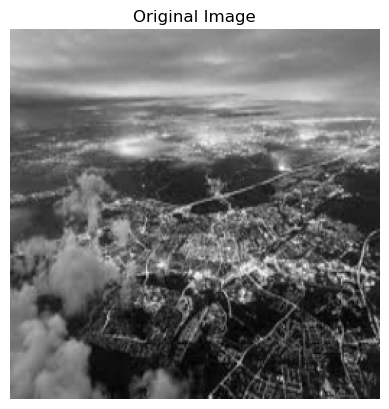

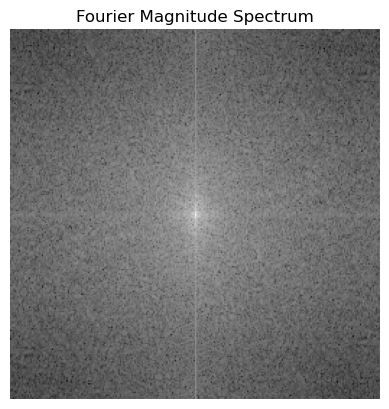

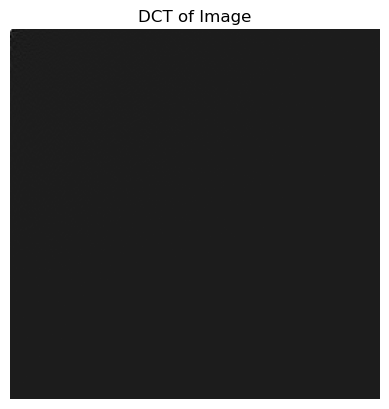

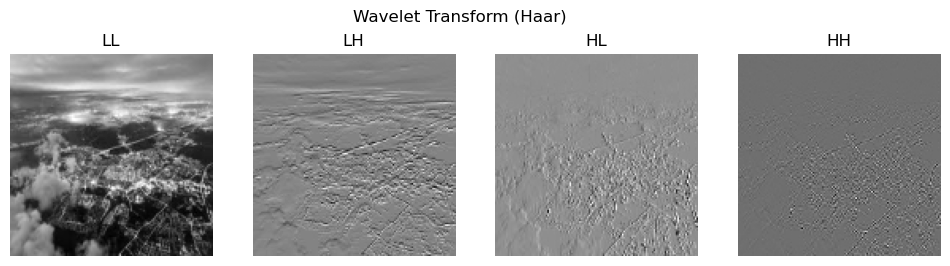

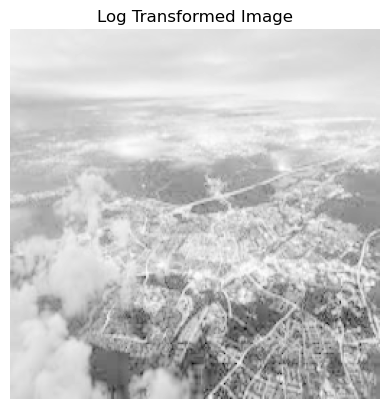

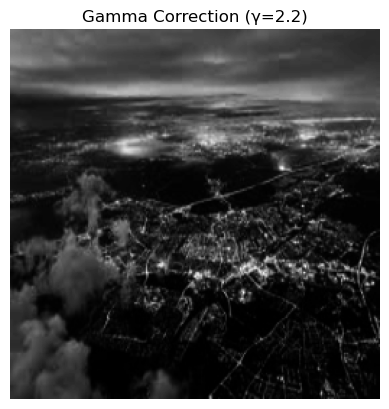

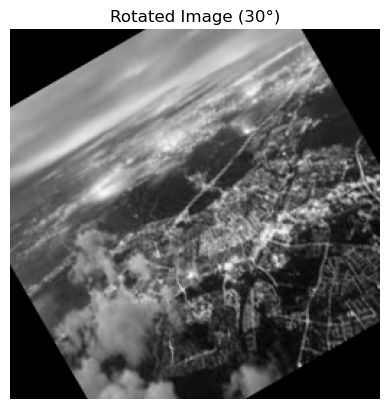

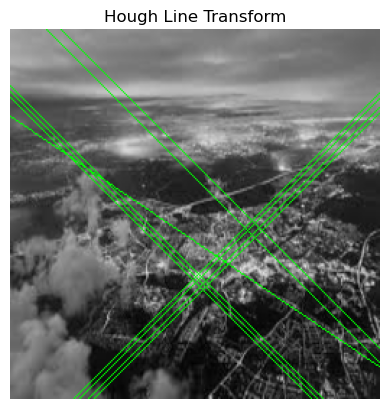

In [1]:
# 🧰 Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data, color
from skimage.exposure import adjust_gamma
from scipy.fftpack import dct
from numpy.fft import fft2, fftshift

# 📥 Load image (grayscale)
img = cv2.imread(r"C:\Users\devik\Downloads\drone.jpeg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 📌 1. Fourier Transform
f_transform = fft2(img)
f_shift = fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Magnitude Spectrum")
plt.axis('off')
plt.show()

# 📌 2. Discrete Cosine Transform (DCT)
img_float = np.float32(img) / 255.0
img_dct = dct(dct(img_float.T, norm='ortho').T, norm='ortho')

plt.imshow(img_dct, cmap='gray')
plt.title("DCT of Image")
plt.axis('off')
plt.show()

# 📌 3. Wavelet Transform (Haar)
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for ax, comp, title in zip(axes, [LL, LH, HL, HH], ['LL', 'LH', 'HL', 'HH']):
    ax.imshow(comp, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.suptitle("Wavelet Transform (Haar)")
plt.show()

# 📌 4. Log Transform
img_log = np.log1p(np.float32(img))
img_log = (img_log / np.max(img_log)) * 255

plt.imshow(img_log, cmap='gray')
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()

# 📌 5. Gamma Correction
gamma = 2.2
img_gamma = adjust_gamma(img, gamma=gamma)

plt.imshow(img_gamma, cmap='gray')
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis('off')
plt.show()

# 📌 6. Geometric Transform (Rotation)
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1)
rotated = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(rotated, cmap='gray')
plt.title("Rotated Image (30°)")
plt.axis('off')
plt.show()

# 📌 7. Hough Transform (Edge + Lines)
edges = cv2.Canny(img, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
hough_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for rho, theta in lines[:10, 0]:  # show only first 10
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(hough_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.imshow(hough_img)
plt.title("Hough Line Transform")
plt.axis('off')
plt.show()


## Frequency domain transformations

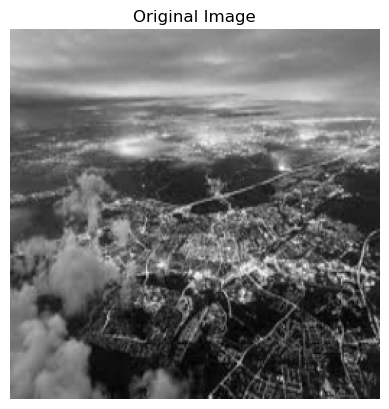

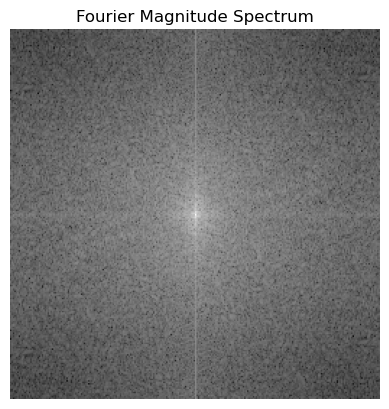

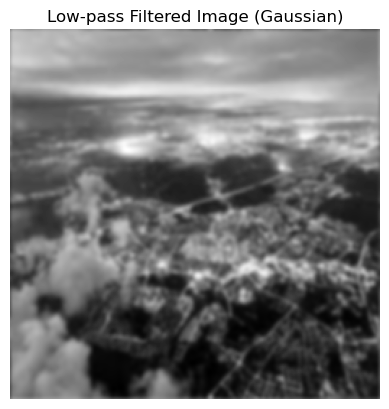

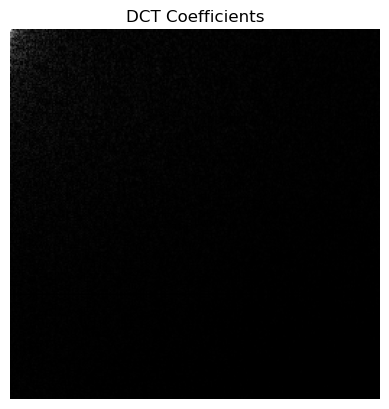

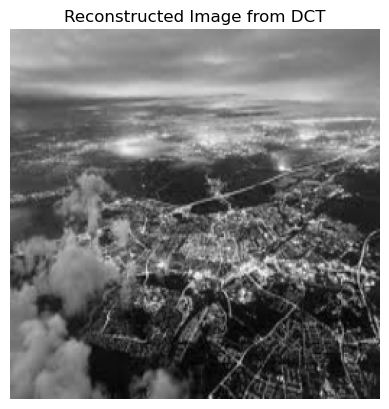

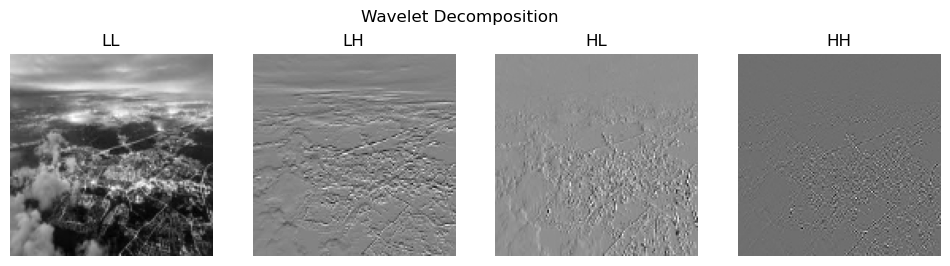

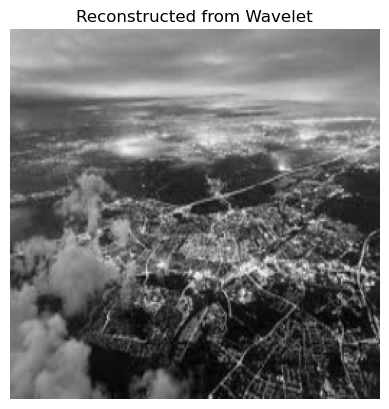

In [2]:
# 🔧 Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import pywt

# 🖼️ Load grayscale image
img = cv2.imread(r"C:\Users\devik\Downloads\drone.jpeg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 1️⃣ Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Magnitude Spectrum")
plt.axis('off')
plt.show()

# 2️⃣ Gaussian Low-Pass Filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.float32)
radius = 30
for u in range(rows):
    for v in range(cols):
        d = np.sqrt((u - crow)**2 + (v - ccol)**2)
        mask[u, v] = np.exp(-(d**2) / (2 * (radius**2)))

# Apply mask and inverse FT
f_filtered = fshift * mask
f_ishift = np.fft.ifftshift(f_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap='gray')
plt.title("Low-pass Filtered Image (Gaussian)")
plt.axis('off')
plt.show()

# 3️⃣ Discrete Cosine Transform (DCT)
img_float = np.float32(img) / 255.0
img_dct = dct(dct(img_float.T, norm='ortho').T, norm='ortho')

plt.imshow(np.log1p(np.abs(img_dct)), cmap='gray')
plt.title("DCT Coefficients")
plt.axis('off')
plt.show()

# Inverse DCT
img_idct = idct(idct(img_dct.T, norm='ortho').T, norm='ortho')

plt.imshow(img_idct, cmap='gray')
plt.title("Reconstructed Image from DCT")
plt.axis('off')
plt.show()

# 4️⃣ Wavelet Transform (Haar)
coeffs = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax, comp, title in zip(axs, [LL, LH, HL, HH], ['LL', 'LH', 'HL', 'HH']):
    ax.imshow(comp, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.suptitle("Wavelet Decomposition")
plt.show()

# Inverse Wavelet
img_wavelet_reconstructed = pywt.idwt2(coeffs, 'haar')
plt.imshow(img_wavelet_reconstructed, cmap='gray')
plt.title("Reconstructed from Wavelet")
plt.axis('off')
plt.show()

## FFTs

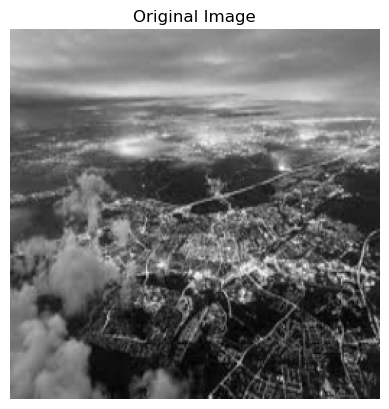

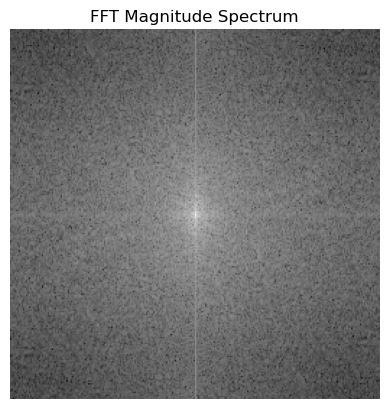

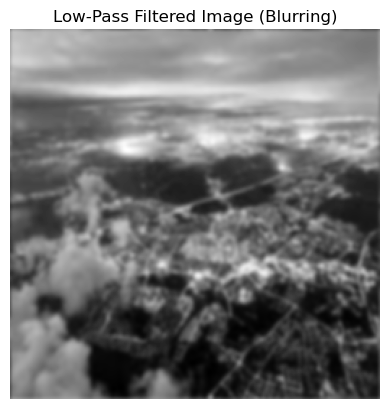

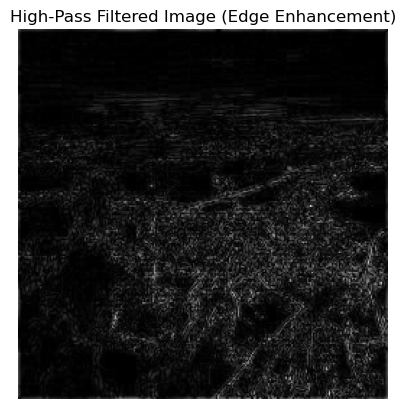

📊 PSNR (Low-Pass Filtered): 26.32 dB
📊 PSNR (High-Pass Filtered): 8.41 dB
📈 SSIM (Low-Pass Filtered): 0.80
📈 SSIM (High-Pass Filtered): 0.05
🌀 Entropy (Low-Pass): 10.97
🌀 Entropy (High-Pass): 10.48


C:\Users\devik\AppData\Local\Temp\ipykernel_13020\2224579342.py:70: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_low = psnr(img, img_low_pass)
C:\Users\devik\AppData\Local\Temp\ipykernel_13020\2224579342.py:71: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_high = psnr(img, img_high_pass)


In [4]:
# 🔧 Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Load and Display Original Image
img = cv2.imread(r"C:\Users\devik\Downloads\drone.jpeg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Resize for consistency

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 2️⃣ Compute FFT and Shift Zero-Frequency Component to Center
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)  # Move low frequencies to center

# Compute Magnitude Spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')
plt.show()

# 3️⃣ Apply Gaussian Low-Pass Filter
rows, cols = img.shape
crow, ccol = rows//2 , cols//2  # Find center

mask = np.zeros((rows, cols), np.float32)
radius = 30  # Low-pass filter radius
for u in range(rows):
    for v in range(cols):
        d = np.sqrt((u - crow)**2 + (v - ccol)**2)
        mask[u, v] = np.exp(-(d**2) / (2 * (radius**2)))

# Apply filter in frequency domain
low_pass_filtered = f_shift * mask

# 4️⃣ Inverse FFT to get the image back
f_ishift = np.fft.ifftshift(low_pass_filtered)  # Shift back
img_low_pass = np.fft.ifft2(f_ishift)  # Inverse FFT
img_low_pass = np.abs(img_low_pass)  # Take magnitude

plt.imshow(img_low_pass, cmap='gray')
plt.title("Low-Pass Filtered Image (Blurring)")
plt.axis('off')
plt.show()

# 5️⃣ Apply High-Pass Filter (Sharpening)
high_pass_filtered = f_shift * (1 - mask)

# Inverse FFT
f_ishift_hp = np.fft.ifftshift(high_pass_filtered)
img_high_pass = np.fft.ifft2(f_ishift_hp)
img_high_pass = np.abs(img_high_pass)

plt.imshow(img_high_pass, cmap='gray')
plt.title("High-Pass Filtered Image (Edge Enhancement)")
plt.axis('off')
plt.show()

# 6️⃣ Evaluate Performance: PSNR, SSIM, Entropy
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from scipy.stats import entropy

# Compute PSNR
psnr_low = psnr(img, img_low_pass)
psnr_high = psnr(img, img_high_pass)

# Compute SSIM
ssim_low = ssim(img, img_low_pass, data_range=img_low_pass.max() - img_low_pass.min())
ssim_high = ssim(img, img_high_pass, data_range=img_high_pass.max() - img_high_pass.min())

# Compute Entropy
entropy_low = entropy(img_low_pass.ravel())
entropy_high = entropy(img_high_pass.ravel())

print(f"📊 PSNR (Low-Pass Filtered): {psnr_low:.2f} dB")
print(f"📊 PSNR (High-Pass Filtered): {psnr_high:.2f} dB")
print(f"📈 SSIM (Low-Pass Filtered): {ssim_low:.2f}")
print(f"📈 SSIM (High-Pass Filtered): {ssim_high:.2f}")
print(f"🌀 Entropy (Low-Pass): {entropy_low:.2f}")
print(f"🌀 Entropy (High-Pass): {entropy_high:.2f}")


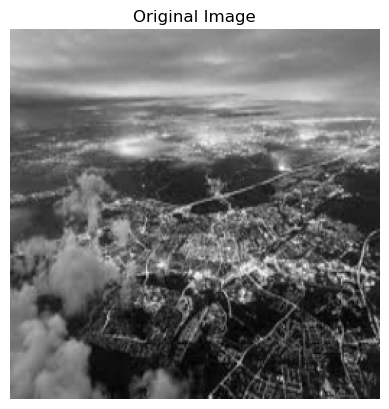

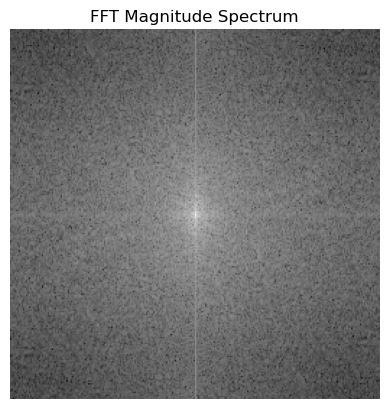

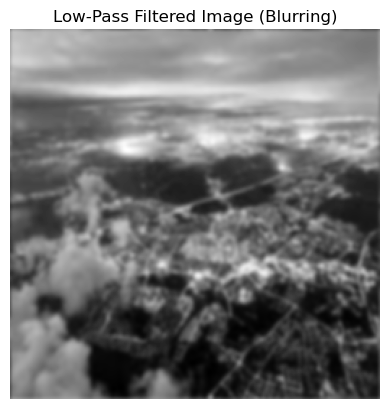

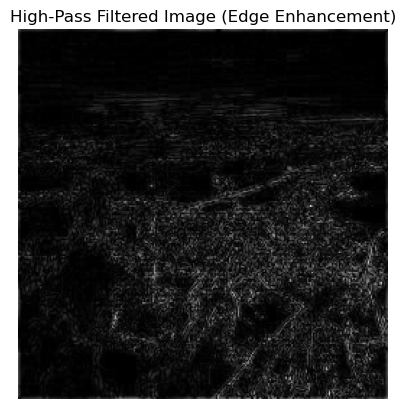

📊 PSNR (Low-Pass Filtered): 26.32 dB
📊 PSNR (High-Pass Filtered): 8.41 dB
📈 SSIM (Low-Pass Filtered): 0.80
📈 SSIM (High-Pass Filtered): 0.05
🌀 Entropy (Low-Pass): 10.97
🌀 Entropy (High-Pass): 10.48


C:\Users\devik\AppData\Local\Temp\ipykernel_13020\2224579342.py:70: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_low = psnr(img, img_low_pass)
C:\Users\devik\AppData\Local\Temp\ipykernel_13020\2224579342.py:71: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_high = psnr(img, img_high_pass)


In [6]:
# 🔧 Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Load and Display Original Image
img = cv2.imread(r"C:\Users\devik\Downloads\drone.jpeg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Resize for consistency

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 2️⃣ Compute FFT and Shift Zero-Frequency Component to Center
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)  # Move low frequencies to center

# Compute Magnitude Spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')
plt.show()

# 3️⃣ Apply Gaussian Low-Pass Filter
rows, cols = img.shape
crow, ccol = rows//2 , cols//2  # Find center

mask = np.zeros((rows, cols), np.float32)
radius = 30  # Low-pass filter radius
for u in range(rows):
    for v in range(cols):
        d = np.sqrt((u - crow)**2 + (v - ccol)**2)
        mask[u, v] = np.exp(-(d**2) / (2 * (radius**2)))

# Apply filter in frequency domain
low_pass_filtered = f_shift * mask

# 4️⃣ Inverse FFT to get the image back
f_ishift = np.fft.ifftshift(low_pass_filtered)  # Shift back
img_low_pass = np.fft.ifft2(f_ishift)  # Inverse FFT
img_low_pass = np.abs(img_low_pass)  # Take magnitude

plt.imshow(img_low_pass, cmap='gray')
plt.title("Low-Pass Filtered Image (Blurring)")
plt.axis('off')
plt.show()

# 5️⃣ Apply High-Pass Filter (Sharpening)
high_pass_filtered = f_shift * (1 - mask)

# Inverse FFT
f_ishift_hp = np.fft.ifftshift(high_pass_filtered)
img_high_pass = np.fft.ifft2(f_ishift_hp)
img_high_pass = np.abs(img_high_pass)

plt.imshow(img_high_pass, cmap='gray')
plt.title("High-Pass Filtered Image (Edge Enhancement)")
plt.axis('off')
plt.show()

# 6️⃣ Evaluate Performance: PSNR, SSIM, Entropy
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from scipy.stats import entropy

# Compute PSNR
psnr_low = psnr(img, img_low_pass)
psnr_high = psnr(img, img_high_pass)

# Compute SSIM
ssim_low = ssim(img, img_low_pass, data_range=img_low_pass.max() - img_low_pass.min())
ssim_high = ssim(img, img_high_pass, data_range=img_high_pass.max() - img_high_pass.min())

# Compute Entropy
entropy_low = entropy(img_low_pass.ravel())
entropy_high = entropy(img_high_pass.ravel())

print(f"📊 PSNR (Low-Pass Filtered): {psnr_low:.2f} dB")
print(f"📊 PSNR (High-Pass Filtered): {psnr_high:.2f} dB")
print(f"📈 SSIM (Low-Pass Filtered): {ssim_low:.2f}")
print(f"📈 SSIM (High-Pass Filtered): {ssim_high:.2f}")
print(f"🌀 Entropy (Low-Pass): {entropy_low:.2f}")
print(f"🌀 Entropy (High-Pass): {entropy_high:.2f}")


## Haar Wavelet

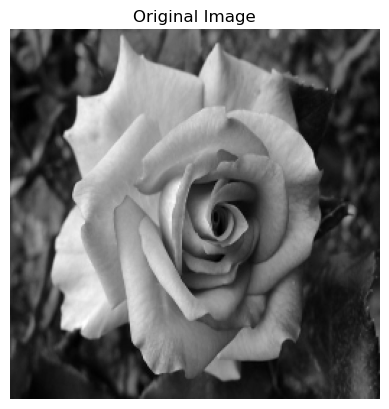

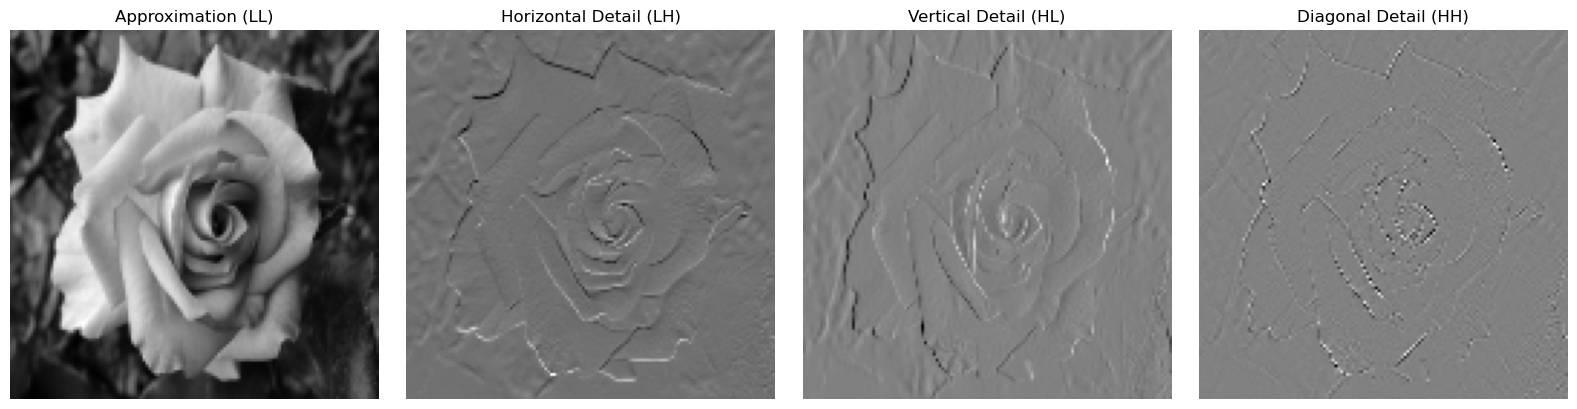

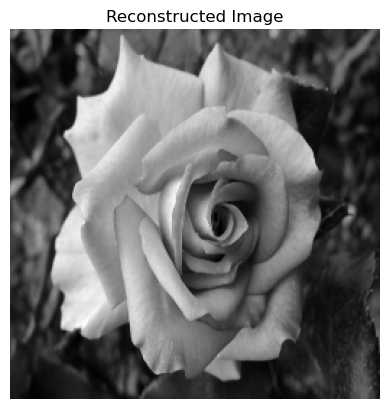

📊 PSNR: 318.30 dB
📈 SSIM: 1.0000
🌀 Entropy: 10.8664


C:\Users\devik\AppData\Local\Temp\ipykernel_13020\1510938491.py:47: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(img, reconstructed_img)


In [9]:
# 🔧 Required Libraries
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from scipy.stats import entropy

# 1️⃣ Load the image and convert to grayscale
img = cv2.imread(r"C:\Users\devik\Downloads\rose5.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found. Check the file path.")

img = cv2.resize(img, (256, 256))  # Ensure power-of-2 dimensions

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 2️⃣ Apply 2D Haar Wavelet Transform
coeffs2 = pywt.dwt2(img, 'haar')  # Single level
LL, (LH, HL, HH) = coeffs2

# 3️⃣ Display Subbands
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
titles = ['Approximation (LL)', 'Horizontal Detail (LH)', 'Vertical Detail (HL)', 'Diagonal Detail (HH)']
images = [LL, LH, HL, HH]

for ax, img_part, title in zip(axs, images, titles):
    ax.imshow(img_part, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

# 4️⃣ Reconstruct the original image from subbands
reconstructed_img = pywt.idwt2(coeffs2, 'haar')

plt.imshow(reconstructed_img, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

# 5️⃣ Evaluation Metrics
psnr_value = psnr(img, reconstructed_img)
ssim_value = ssim(img, reconstructed_img, data_range=reconstructed_img.max() - reconstructed_img.min())
entropy_value = entropy(reconstructed_img.ravel())

print(f"📊 PSNR: {psnr_value:.2f} dB")
print(f"📈 SSIM: {ssim_value:.4f}")
print(f"🌀 Entropy: {entropy_value:.4f}")


## Multi Resolution Analysis

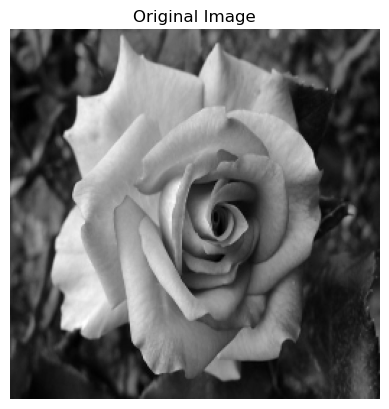

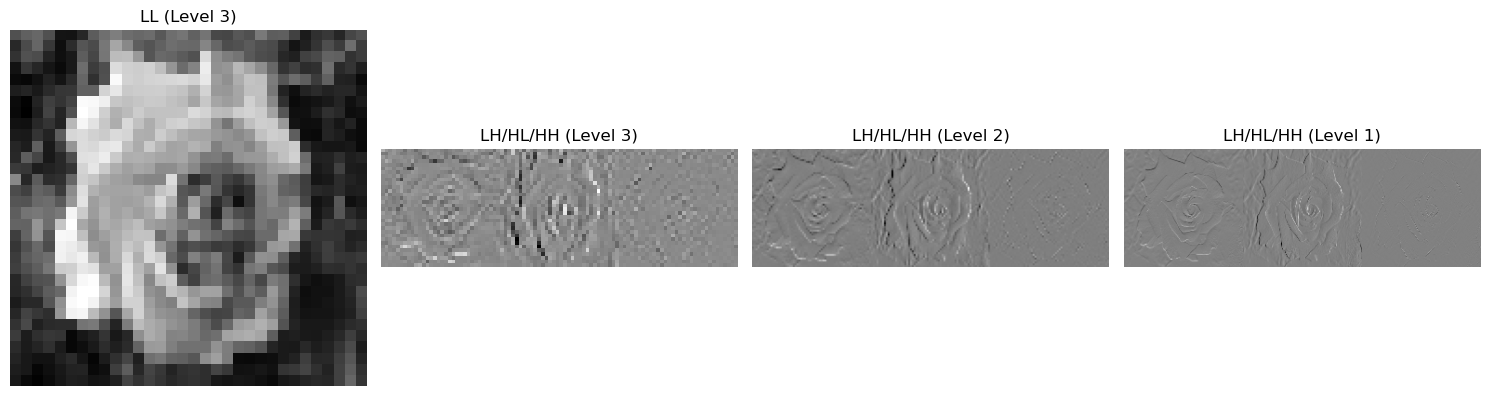

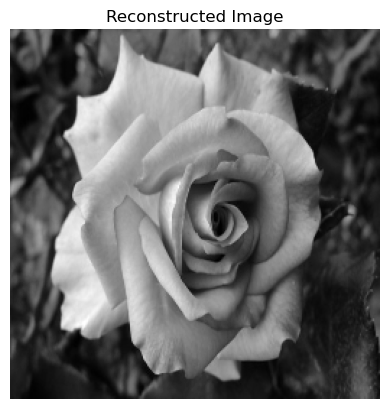

📊 PSNR: 309.19 dB
📈 SSIM: 1.0000
🌀 Entropy: 10.8664


C:\Users\devik\AppData\Local\Temp\ipykernel_13020\512971449.py:53: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_val = psnr(img, reconstructed)


In [10]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from scipy.stats import entropy

# 1. Load and preprocess image
img = cv2.imread(r"C:\Users\devik\Downloads\rose5.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found.")
img = cv2.resize(img, (256, 256))

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 2. Apply multilevel wavelet decomposition
wavelet = 'haar'
level = 3  # Number of decomposition levels
coeffs = pywt.wavedec2(img, wavelet=wavelet, level=level)

# 3. Visualize approximation and detail coefficients
def plot_mra(coeffs):
    fig, axes = plt.subplots(1, level + 1, figsize=(15, 4))
    for i in range(level + 1):
        if i == 0:
            cA = coeffs[0]
            axes[0].imshow(cA, cmap='gray')
            axes[0].set_title("LL (Level 3)")
        else:
            cH, cV, cD = coeffs[i]
            merged = np.hstack((cH, cV, cD))
            axes[i].imshow(merged, cmap='gray')
            axes[i].set_title(f"LH/HL/HH (Level {level - i + 1})")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

plot_mra(coeffs)

# 4. Reconstruct image
reconstructed = pywt.waverec2(coeffs, wavelet)

# 5. Display reconstructed image
plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

# 6. Evaluation metrics
psnr_val = psnr(img, reconstructed)
ssim_val = ssim(img, reconstructed, data_range=reconstructed.max() - reconstructed.min())
entropy_val = entropy(reconstructed.ravel())

print(f"📊 PSNR: {psnr_val:.2f} dB")
print(f"📈 SSIM: {ssim_val:.4f}")
print(f"🌀 Entropy: {entropy_val:.4f}")


## Scale-Invariant Features

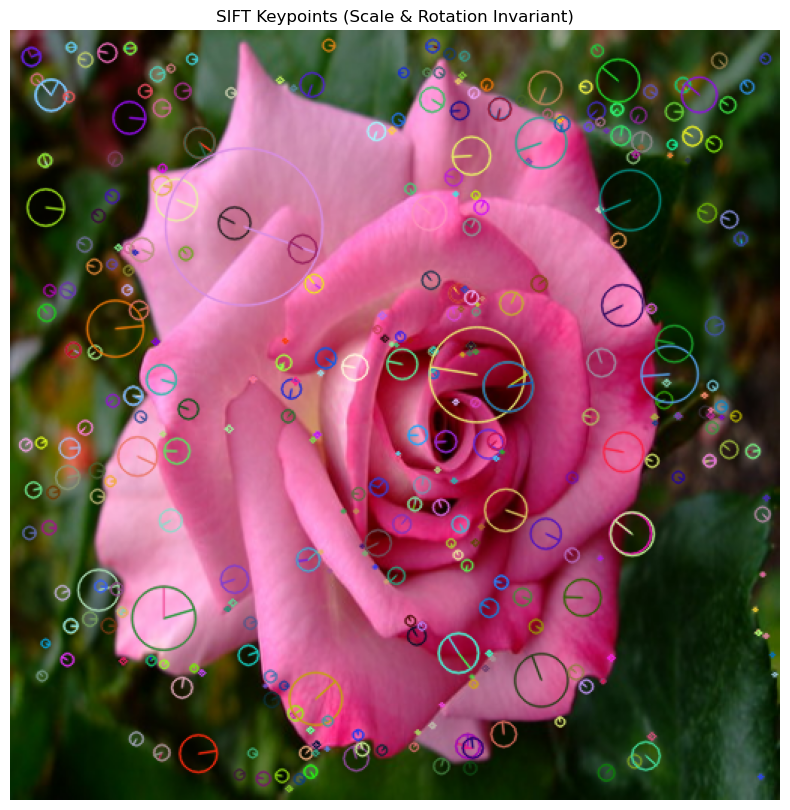

🧷 Total Keypoints Detected: 389
🔢 Descriptor Shape: (389, 128)


In [11]:
#SIFT
import cv2
import matplotlib.pyplot as plt

# 1️⃣ Load and resize the image
img = cv2.imread(r"C:\Users\devik\Downloads\rose5.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check the file path.")
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2️⃣ Create SIFT detector
sift = cv2.SIFT_create()

# 3️⃣ Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 4️⃣ Draw keypoints on the image
img_kp = cv2.drawKeypoints(img, keypoints, None,
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 5️⃣ Show image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints (Scale & Rotation Invariant)")
plt.axis('off')
plt.show()

# 6️⃣ Print number of features and descriptor shape
print(f"🧷 Total Keypoints Detected: {len(keypoints)}")
print(f"🔢 Descriptor Shape: {descriptors.shape}")


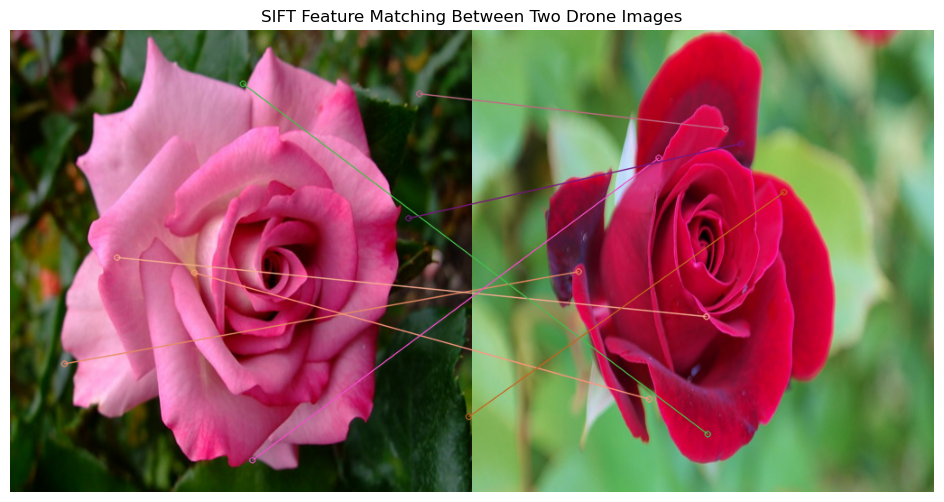

✅ Good matches found: 8


In [13]:
#Matching features of images
import cv2
import matplotlib.pyplot as plt

# Load and resize the first image
img1 = cv2.imread(r"C:\Users\devik\Downloads\rose5.jpg")
if img1 is None:
    raise FileNotFoundError("Image 'drone1.jpg' not found.")
img1 = cv2.resize(img1, (512, 512))
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Load and resize the second image
img2 = cv2.imread(r"C:\Users\devik\Downloads\rose4.jpg")
if img2 is None:
    raise FileNotFoundError("Image 'drone2.jpg' not found.")
img2 = cv2.resize(img2, (512, 512))
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Brute-Force matcher with k-nearest neighbors (k=2)
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

# Draw matches
matched_img = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)

# Show the matching result
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching Between Two Drone Images")
plt.axis('off')
plt.show()

print(f"✅ Good matches found: {len(good_matches)}")
